In [84]:
import yfinance as yf

In [85]:
df = yf.download('BTC-USD', start="2020-01-01",end="2021-09-20")

[*********************100%***********************]  1 of 1 completed


In [86]:
df['MA5'] = df['Adj Close'].rolling(window=200).mean()
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA5
Date,,,,,,,
2020-07-18,9151.183594,9230.983398,9100.824219,9159.040039,9159.040039,12252601475,8534.617922
2020-07-19,9158.005859,9201.398438,9097.632812,9185.817383,9185.817383,12939002784,8544.579014
2020-07-20,9187.220703,9214.270508,9137.509766,9164.231445,9164.231445,13755604146,8554.399299
2020-07-21,9162.514648,9407.262695,9149.389648,9374.887695,9374.887695,18069581956,8566.346387
2020-07-22,9375.080078,9530.518555,9319.653320,9525.363281,9525.363281,16532254884,8577.248782
...,...,...,...,...,...,...,...
2021-09-15,47098.000000,48450.468750,46773.328125,48176.347656,48176.347656,30484496466,45921.771230
2021-09-16,48158.906250,48486.828125,47079.558594,47783.359375,47783.359375,31764293754,45934.999180
2021-09-17,47771.003906,48160.921875,46832.523438,47267.519531,47267.519531,28727713711,45923.180566


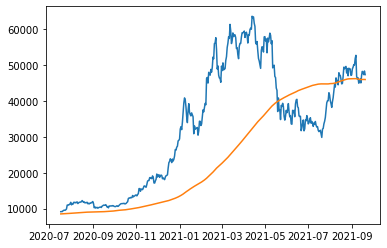

In [87]:
import matplotlib.pyplot as plt
plt.plot(df['Adj Close'])
plt.plot(df['MA5'])
plt.show()

In [88]:
df['price change'] = df['Adj Close'].pct_change()

<ipython-input-88-29e39629e417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price change'] = df['Adj Close'].pct_change()


In [89]:
df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)

<ipython-input-89-b84c4713b242>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
<ipython-input-89-b84c4713b242>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)


In [90]:
df['avg Up'] = df['Upmove'].ewm(span=19).mean()
df['avg Down'] = df['Downmove'].ewm(span=19).mean()

<ipython-input-90-162c3472f967>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg Up'] = df['Upmove'].ewm(span=19).mean()
<ipython-input-90-162c3472f967>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg Down'] = df['Downmove'].ewm(span=19).mean()


In [91]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA5,price change,Upmove,Downmove,avg Up,avg Down
Date,,,,,,,,,,,,
2020-07-19,9158.005859,9201.398438,9097.632812,9185.817383,9185.817383,12939002784,8544.579014,0.002924,0.002924,0.000000,0.001539,0.000000
2020-07-20,9187.220703,9214.270508,9137.509766,9164.231445,9164.231445,13755604146,8554.399299,-0.002350,0.000000,0.002350,0.000971,0.000867
2020-07-21,9162.514648,9407.262695,9149.389648,9374.887695,9374.887695,18069581956,8566.346387,0.022987,0.022987,0.000000,0.007373,0.000615
2020-07-22,9375.080078,9530.518555,9319.653320,9525.363281,9525.363281,16532254884,8577.248782,0.016051,0.016051,0.000000,0.009492,0.000465
2020-07-23,9527.141602,9610.247070,9483.003906,9581.072266,9581.072266,18146399002,8588.100859,0.005848,0.005848,0.000000,0.008714,0.000366
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-15,47098.000000,48450.468750,46773.328125,48176.347656,48176.347656,30484496466,45921.771230,0.023015,0.023015,0.000000,0.014582,0.011632
2021-09-16,48158.906250,48486.828125,47079.558594,47783.359375,47783.359375,31764293754,45934.999180,-0.008157,0.000000,0.008157,0.013124,0.011285
2021-09-17,47771.003906,48160.921875,46832.523438,47267.519531,47267.519531,28727713711,45923.180566,-0.010795,0.000000,0.010795,0.011811,0.011236
